In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
data = pd.read_csv('EastWestAirlines.csv')

In [45]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [47]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [48]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [49]:
data[data.duplicated()].shape

(0, 12)

In [50]:
data[data.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


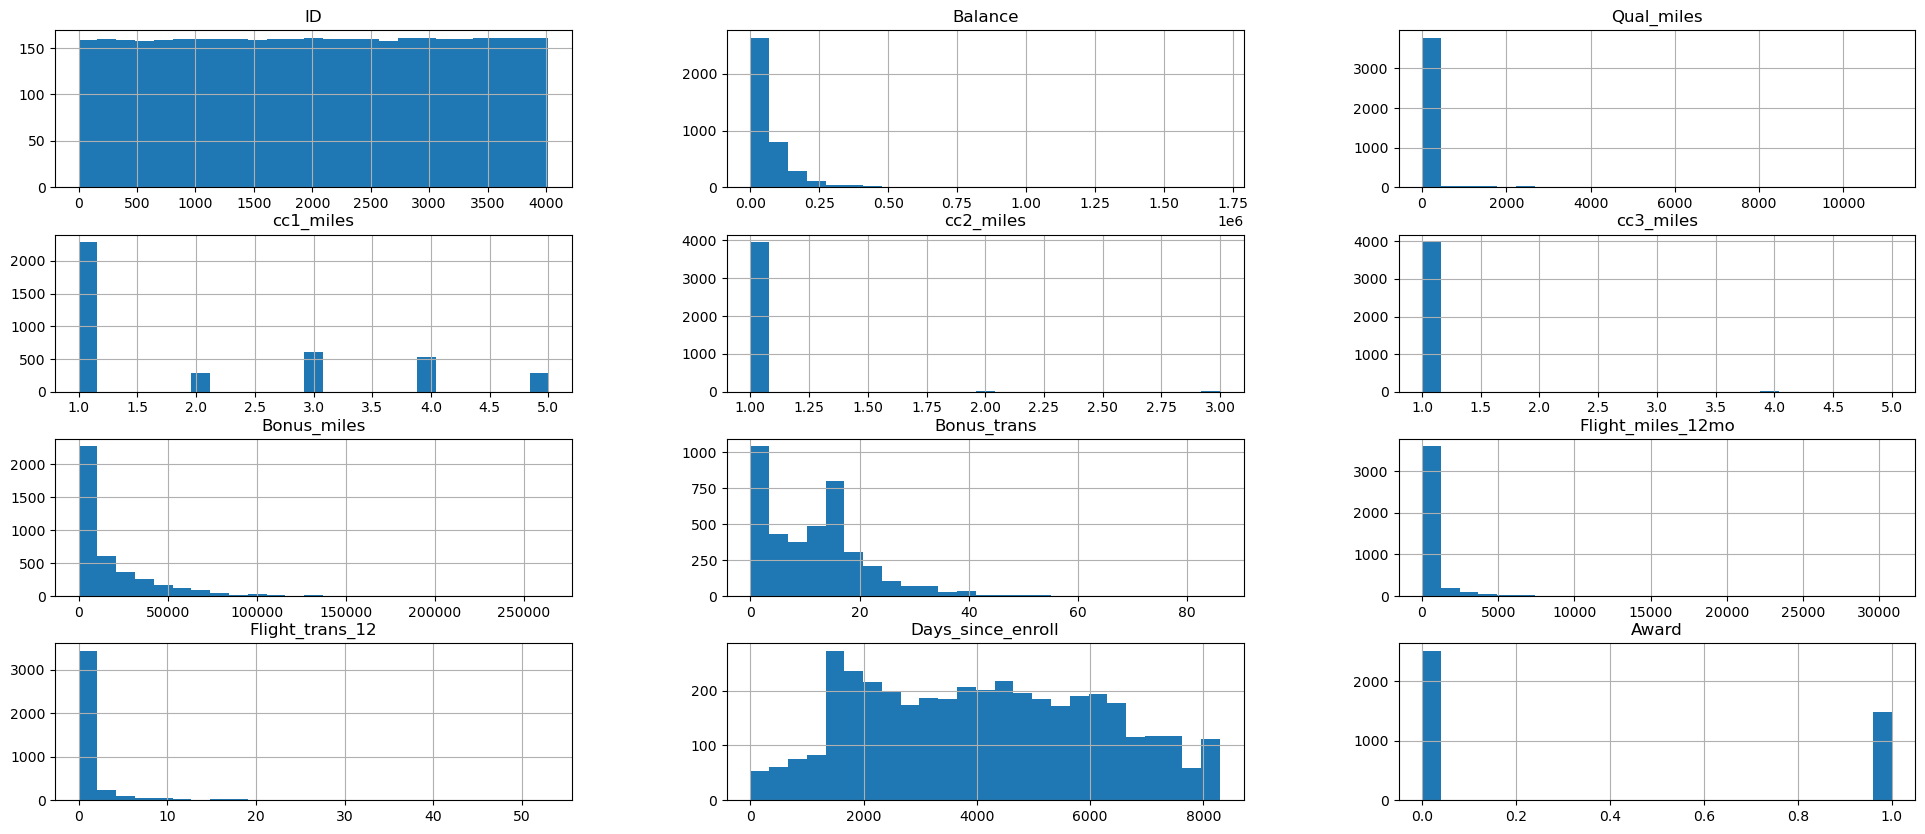

In [51]:
data.hist(figsize=(24,10),bins=25)
plt.show()

<Axes: >

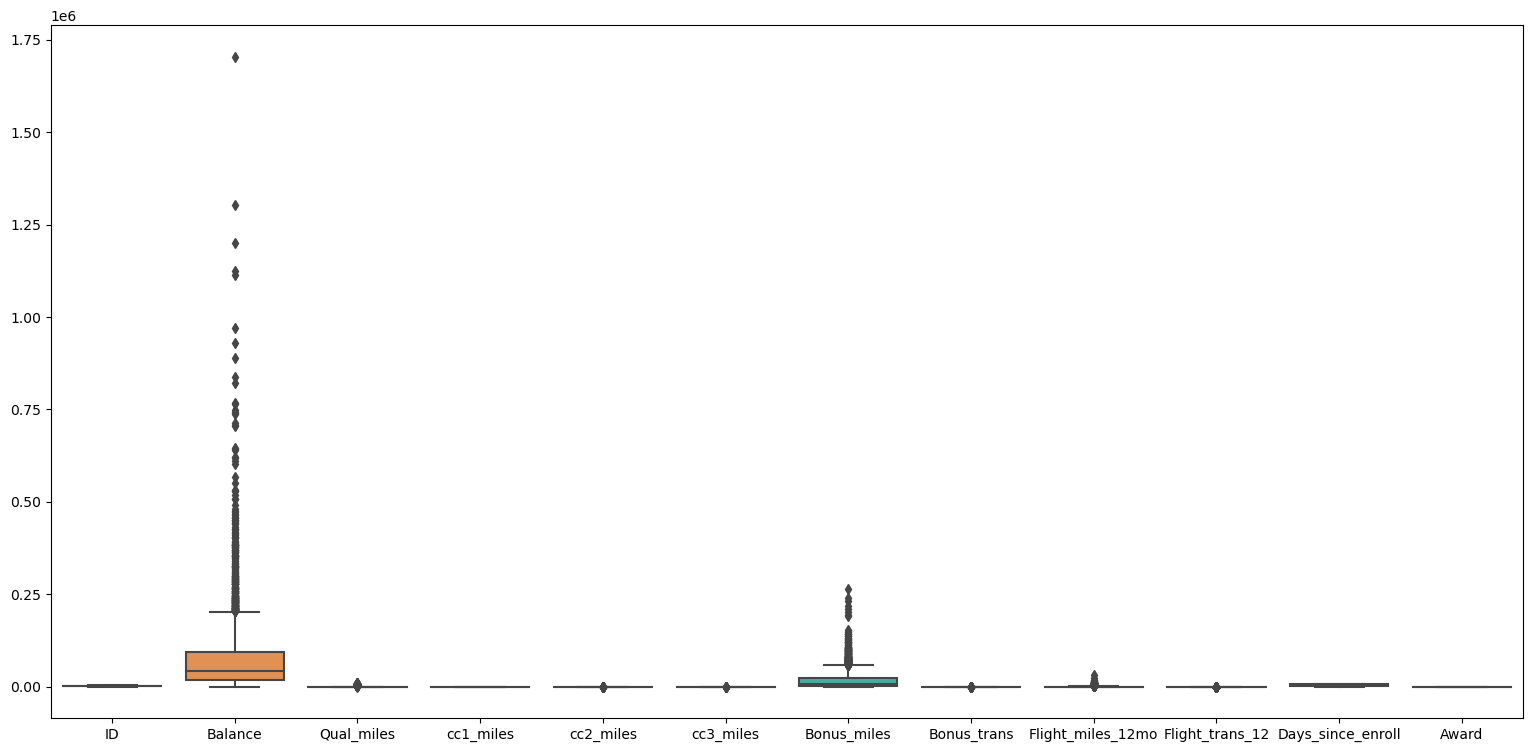

In [52]:
plt.figure(figsize=(19,9))
sns.boxplot(data=data)

In [53]:
data.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


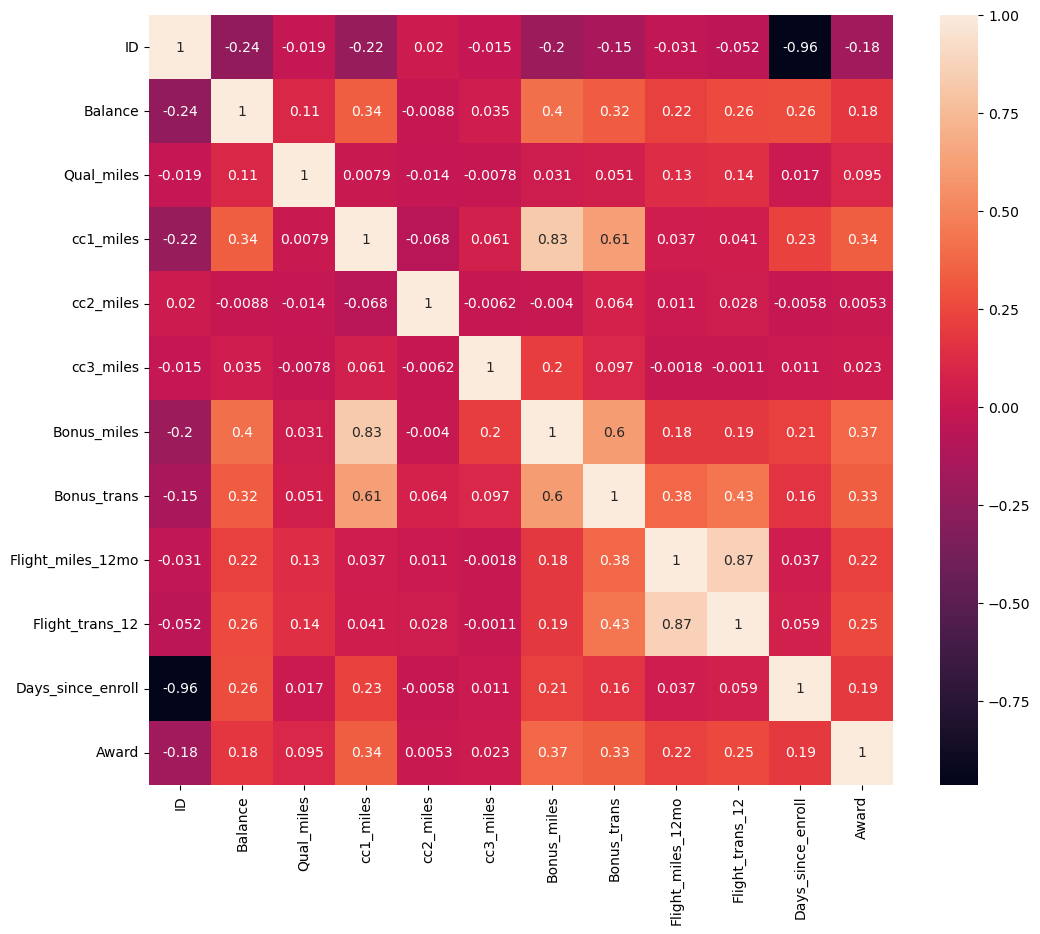

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [55]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [56]:
feature = data.iloc[:,1:11]

In [57]:
feature

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [58]:
minmax = MinMaxScaler()

In [59]:
features= pd.DataFrame(minmax.fit_transform(feature),columns=feature.columns)

In [60]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [61]:
features.shape

(3999, 10)

In [62]:
agg= AgglomerativeClustering(n_clusters=12)

In [63]:
cl =agg.fit(features)

In [64]:
np.unique(cl.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [65]:
silhouette_score(features,cl.labels_)

0.3253377103579294

In [66]:
import scipy.cluster.hierarchy as sch

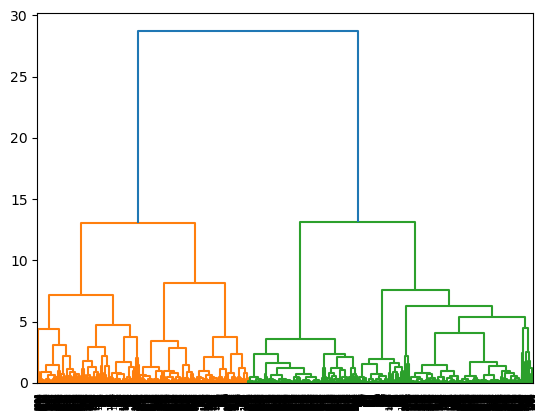

In [67]:
dendrogram= sch.dendrogram(sch.linkage(features, method='ward'))

# K - Means

In [68]:
b=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(features)
    b.append(kmeans.inertia_)

C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [69]:
b

[898.2705822007467,
 448.9989194445697,
 331.4330797303769,
 272.3927662116429,
 241.077202343926,
 217.76142138761284,
 200.25875998382622,
 182.71713097552893,
 171.79305814246152,
 164.49912734979898]

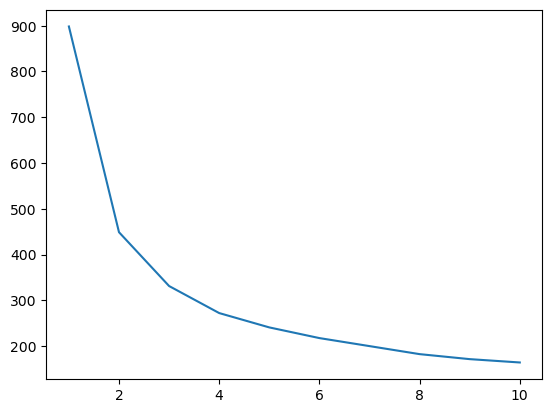

In [70]:
plt.plot(range(1,11),b)

In [81]:
kmeans= KMeans(n_clusters=4)

In [82]:
cl2= kmeans.fit(features)
cl2

C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [83]:
np.unique(cl2.labels_)

array([0, 1, 2, 3])

In [84]:
features['clusterkmean'] = cl2.labels_

In [85]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterkmean
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,3
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


In [86]:
cl2.cluster_centers_

array([[2.36724363e-02, 1.09788344e-02, 2.37926136e-02, 1.10085227e-02,
        1.24289773e-03, 1.69214392e-02, 8.35177722e-02, 1.28437586e-02,
        2.19500429e-02, 2.65314415e-01, 2.00000000e+00],
       [3.87082781e-02, 1.52707004e-02, 3.21888412e-02, 1.07296137e-02,
        1.50214592e-03, 1.96348371e-02, 9.29234455e-02, 1.58009047e-02,
        2.81156369e-02, 6.93991623e-01, 5.99520433e-15],
       [8.05148873e-02, 1.47645960e-02, 7.54016064e-01, 6.69344043e-04,
        8.70147256e-03, 1.78146423e-01, 2.29024626e-01, 1.93540058e-02,
        3.36692683e-02, 7.44146427e-01, 3.00000000e+00],
       [5.01832357e-02, 1.09262286e-02, 6.25920471e-01, 7.36377025e-04,
        3.31369661e-03, 1.18174302e-01, 2.09953077e-01, 1.28867533e-02,
        2.18412204e-02, 3.63597299e-01, 1.00000000e+00]])

In [87]:
silhouette_score(features,cl2.labels_)

0.7282229127749776

# DB Scan

In [88]:
features.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterkmean
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,2


In [89]:
eps=[0.1,0.2,0.3,0.4,0.5]
min_node= range(1,10)

In [95]:
final = []
for ep in eps:
    for min in min_node:
        labels = DBSCAN(eps=ep,min_samples=min).fit(features).labels_
        score= silhouette_score(features,labels)
        final.append((ep,min,score))

In [96]:
final

[(0.1, 1, 0.02007063083929535),
 (0.1, 2, 0.15762916309533878),
 (0.1, 3, 0.29455960957580846),
 (0.1, 4, 0.2975473917718896),
 (0.1, 5, 0.2945512470905623),
 (0.1, 6, 0.2919436565973082),
 (0.1, 7, 0.28959054275293356),
 (0.1, 8, 0.24310856404023273),
 (0.1, 9, 0.23231808972051918),
 (0.2, 1, 0.32552536436041174),
 (0.2, 2, 0.3515922426045454),
 (0.2, 3, 0.35584700170550865),
 (0.2, 4, 0.35442111731762055),
 (0.2, 5, 0.35144346448590214),
 (0.2, 6, 0.34867758394847015),
 (0.2, 7, 0.34862146413124695),
 (0.2, 8, 0.34861906905433127),
 (0.2, 9, 0.3451712415844465),
 (0.3, 1, 0.48055144153642315),
 (0.3, 2, 0.5178156418353209),
 (0.3, 3, 0.5669347408205119),
 (0.3, 4, 0.5870734690987105),
 (0.3, 5, 0.5866442379192599),
 (0.3, 6, 0.5866442379192599),
 (0.3, 7, 0.5845623019206558),
 (0.3, 8, 0.5819882245639664),
 (0.3, 9, 0.5819382802940266),
 (0.4, 1, 0.5070006934799944),
 (0.4, 2, 0.5650946670299664),
 (0.4, 3, 0.5740548672454026),
 (0.4, 4, 0.5740548672454026),
 (0.4, 5, 0.5740548672454

In [98]:
a=pd.DataFrame(final)

In [99]:
a

,0,1,2
0,0.1,1,0.020071
1,0.1,2,0.157629
2,0.1,3,0.294560
3,0.1,4,0.297547
4,0.1,5,0.294551
5,0.1,6,0.291944
6,0.1,7,0.289591
7,0.1,8,0.243109
8,0.1,9,0.232318
9,0.2,1,0.325525


In [100]:
b=a.iloc[:,2].max()

In [101]:
b

0.5961936021565358

In [102]:
a[a[2]==b]

,0,1,2
32,0.4,6,0.596194


In [103]:
labels= DBSCAN(eps=0.4, min_samples=6)

In [104]:
labels.fit(features)

DBSCAN(eps=0.4, min_samples=6)

In [105]:
labels.labels_

array([0, 0, 0, ..., 4, 5, 5], dtype=int64)

In [106]:
features['clustersDB'] = labels.labels_

In [107]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterkmean,clustersDB
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,1,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,1,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,1,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,1,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0,5
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0,5
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,3,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0,5


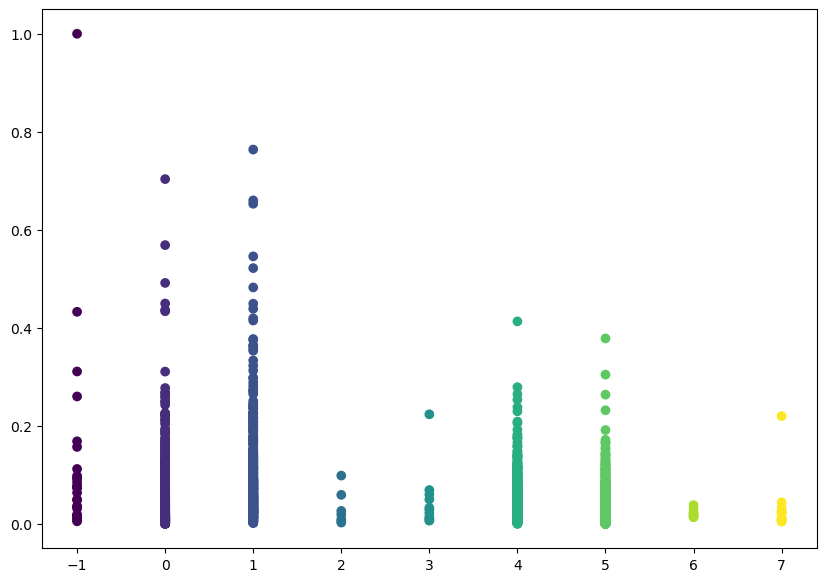

In [108]:
plt.figure(figsize=(10, 7))  
plt.scatter(features['clustersDB'],features['Balance'], c=labels.labels_) 